In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bproperty_data.csv")
df1.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [3]:
df1.shape

(4704, 11)

In [4]:
df1.columns

Index(['Unnamed: 0', 'Location', 'Price', 'Type', 'No. Beds', 'No. Baths',
       'Area', 'Latitude', 'Longitude', 'Region', 'Sub-region'],
      dtype='object')

In [5]:
df1['Location'].unique()

array(['Sector 10, Uttara, Dhaka', 'Section 11, Mirpur, Dhaka',
       'Chowdhuripara, Khilgaon, Dhaka', 'Road No 4, Banani, Dhaka',
       'South Banasree Project, Banasree, Dhaka',
       'Shantinagar Bazar Rd, Shantinagar, Dhaka',
       'West Rampura, Rampura, Dhaka', 'Farmgate, Tejgaon, Dhaka',
       'New Eskaton Road, Eskaton, Dhaka', 'Paikpara, Mirpur, Dhaka',
       'Sector 9, Uttara, Dhaka', 'Pirerbag, Mirpur, Dhaka',
       'Sector 11, Uttara, Dhaka', 'East Rampura, Rampura, Dhaka',
       'East Maniknagar, Maniknagar, Dhaka', 'Middle Badda, Badda, Dhaka',
       'Sector 12, Uttara, Dhaka', 'Ashkona, Dakshin Khan, Dhaka',
       'Block G, Bashundhara R-A, Dhaka', 'Road No 2, Shyamoli, Dhaka',
       'Goran, Khilgaon, Dhaka', 'Majed Sardar Road, Bangshal, Dhaka',
       'Green Road, Kathalbagan, Dhaka', 'Hemayetpur, Savar, Dhaka',
       'Manda, Mugdapara, Dhaka', 'Mastertek, Cantonment, Dhaka',
       'Sector 4, Uttara, Dhaka', 'Jurain, Shyampur, Dhaka',
       'Sector 18, U

In [6]:
df1['Location'].value_counts()

Location
West Shewrapara, Mirpur, Dhaka              111
Uttar Badda, Badda, Dhaka                   108
Sector 10, Uttara, Dhaka                     96
Chandrima Model Town, Mohammadpur, Dhaka     93
Ashkona, Dakshin Khan, Dhaka                 87
                                           ... 
Block K, Aftab Nagar, Dhaka                   1
Road No 4, Banani DOHS, Dhaka                 1
Block K, Bashundhara R-A, Dhaka               1
Karatitola, Sutrapur, Dhaka                   1
Nawabpur Road, Bangshal, Dhaka                1
Name: count, Length: 555, dtype: int64

In [7]:
df2 = df1.drop(['Type','Latitude','Longitude','Region','Sub-region','Unnamed: 0'],axis='columns')
df2.shape
df2.head()

,Location,Price,No. Beds,No. Baths,Area
0,"Sector 10, Uttara, Dhaka",7500000,3.0,3.0,1300.0
1,"Section 11, Mirpur, Dhaka",7280000,4.0,4.0,1456.0
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,3.0,3.0,1550.0
3,"Road No 4, Banani, Dhaka",37000000,3.0,3.0,2669.0
4,"South Banasree Project, Banasree, Dhaka",3600000,2.0,2.0,835.0


In [8]:
df2.isnull().sum()

Location       0
Price          0
No. Beds     204
No. Baths    204
Area           0
dtype: int64

In [9]:
df2['No. Beds'] = df2['No. Beds'].fillna(df2['No. Beds'].median())
df2['No. Baths'] = df2['No. Baths'].fillna(df2['No. Baths'].median())

In [10]:
df2.isnull().sum()

Location     0
Price        0
No. Beds     0
No. Baths    0
Area         0
dtype: int64

In [11]:
df2['No. Beds'].unique()

array([ 3.,  4.,  2., 12., 16.,  5.,  1., 27., 22., 20., 36.,  7.,  6.,
       24., 15., 32., 46., 26., 18.,  9.,  8., 14.])

In [12]:
df2['No. Baths'].unique()

array([ 3.,  4.,  2.,  1., 10.,  6.,  5.,  8.,  7.])

In [13]:
df2[df2['No. Beds']>20]

,Location,Price,No. Beds,No. Baths,Area
195,"Section 2, Mirpur, Dhaka",36000000,27.0,10.0,9750.0
228,"Pirerbag, Mirpur, Dhaka",40000000,22.0,10.0,11880.0
395,"Block J, Bashundhara R-A, Dhaka",75000000,36.0,10.0,6000.0
629,"Dhalpur, Jatra Bari, Dhaka",25000000,24.0,10.0,8000.0
2868,"Block J, Bashundhara R-A, Dhaka",80000000,32.0,10.0,8050.0
2904,"Section 1, Mirpur, Dhaka",75000000,46.0,10.0,19200.0
2921,"Section 6, Mirpur, Dhaka",39000000,26.0,10.0,8425.0


In [14]:
df2['Area'].unique()

array([ 1300.,  1456.,  1550.,  2669.,   835.,  1260.,   750.,   938.,
        1455.,  1376.,  1895.,  1785.,  2000.,  1525.,   960.,  1528.,
        1510.,  1980.,  1150.,  1200.,  1050.,  1100.,  1280.,  1275.,
         900.,   970.,   950.,   320.,  1110.,  3640.,  2184.,   940.,
        6684.,  5400.,  1654.,  1334.,   850.,  1650.,  1250.,  1000.,
        1500.,   880.,   790.,   650.,  1220.,   975.,  2200.,  5000.,
        1080.,  3244.,  1315.,   980.,  1630.,  1503.,  1060.,   800.,
        2570.,  2640.,  2674.,  1278.,  1203.,  1809.,  1530.,  1008.,
        1575.,  1440.,   815.,  1115.,  1560.,  2400.,  1450.,   930.,
        2745.,  2572.,  1400.,  2110.,  2374.,  2334.,  1595.,  2500.,
        1890.,  4368.,  1375.,   600.,  2016.,  1350.,  1460.,  1065.,
        9750.,  1369.,   920.,  1265.,  1140.,  1380.,  1513.,  5600.,
        1025.,  1590.,  1700.,  1215.,  1322.,  1251.,  1323., 11880.,
        1392.,  1221.,   425.,  2700.,  1900.,  1075.,  1662.,  1605.,
      

In [15]:
df3 = df2.copy()
df3['Price_per_sqft'] = df3['Price']/df3['Area']
df3.head()

,Location,Price,No. Beds,No. Baths,Area,Price_per_sqft
0,"Sector 10, Uttara, Dhaka",7500000,3.0,3.0,1300.0,5769.230769
1,"Section 11, Mirpur, Dhaka",7280000,4.0,4.0,1456.0,5000.000000
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,3.0,3.0,1550.0,8387.096774
3,"Road No 4, Banani, Dhaka",37000000,3.0,3.0,2669.0,13862.869989
4,"South Banasree Project, Banasree, Dhaka",3600000,2.0,2.0,835.0,4311.377246


In [16]:
df3.head()

,Location,Price,No. Beds,No. Baths,Area,Price_per_sqft
0,"Sector 10, Uttara, Dhaka",7500000,3.0,3.0,1300.0,5769.230769
1,"Section 11, Mirpur, Dhaka",7280000,4.0,4.0,1456.0,5000.000000
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,3.0,3.0,1550.0,8387.096774
3,"Road No 4, Banani, Dhaka",37000000,3.0,3.0,2669.0,13862.869989
4,"South Banasree Project, Banasree, Dhaka",3600000,2.0,2.0,835.0,4311.377246


In [17]:
len(df3['Location'].unique())

555

In [18]:
df3.location = df3.Location.apply(lambda x: x.strip())
Location_stats = df3['Location'].value_counts(ascending=False)
Location_stats

/tmp/ipykernel_5464/1548644348.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df3.location = df3.Location.apply(lambda x: x.strip())


Location
West Shewrapara, Mirpur, Dhaka              111
Uttar Badda, Badda, Dhaka                   108
Sector 10, Uttara, Dhaka                     96
Chandrima Model Town, Mohammadpur, Dhaka     93
Ashkona, Dakshin Khan, Dhaka                 87
                                           ... 
Block K, Aftab Nagar, Dhaka                   1
Road No 4, Banani DOHS, Dhaka                 1
Block K, Bashundhara R-A, Dhaka               1
Karatitola, Sutrapur, Dhaka                   1
Nawabpur Road, Bangshal, Dhaka                1
Name: count, Length: 555, dtype: int64

In [19]:
Location_stats.values.sum()

4704

In [20]:
len(Location_stats[Location_stats>4])

220

In [21]:
len(Location_stats)

555

In [22]:
len(Location_stats[Location_stats<=4])

335

In [23]:
Location_stats_less_than_4 = Location_stats[Location_stats<=4]
Location_stats_less_than_4

Location
Road No 5, Banani, Dhaka                           4
Road No 4, Shyamoli, Dhaka                         4
Bagicha Mashjid Road, North Shahjahanpur, Dhaka    4
Sector 15, Uttara, Dhaka                           4
Rupnagar R/A, Mirpur, Dhaka                        4
                                                  ..
Block K, Aftab Nagar, Dhaka                        1
Road No 4, Banani DOHS, Dhaka                      1
Block K, Bashundhara R-A, Dhaka                    1
Karatitola, Sutrapur, Dhaka                        1
Nawabpur Road, Bangshal, Dhaka                     1
Name: count, Length: 335, dtype: int64

In [24]:
len(df3.Location.unique())

555

In [25]:
df3.Location = df3.Location.apply(lambda x: 'Other' if x in Location_stats_less_than_4 else x)
len(df3.Location.unique())


221

In [26]:
df3.head(10)

,Location,Price,No. Beds,No. Baths,Area,Price_per_sqft
0,"Sector 10, Uttara, Dhaka",7500000,3.0,3.0,1300.0,5769.230769
1,"Section 11, Mirpur, Dhaka",7280000,4.0,4.0,1456.0,5000.000000
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,3.0,3.0,1550.0,8387.096774
3,"Road No 4, Banani, Dhaka",37000000,3.0,3.0,2669.0,13862.869989
4,"South Banasree Project, Banasree, Dhaka",3600000,2.0,2.0,835.0,4311.377246
5,"Section 11, Mirpur, Dhaka",6800000,3.0,3.0,1260.0,5396.825397
6,"Section 11, Mirpur, Dhaka",6800000,3.0,3.0,1260.0,5396.825397
7,Other,5500000,2.0,2.0,750.0,7333.333333
8,"West Rampura, Rampura, Dhaka",6700000,3.0,2.0,938.0,7142.857143
9,"Farmgate, Tejgaon, Dhaka",13500000,3.0,3.0,1455.0,9278.350515


In [27]:
df3.shape

(4704, 6)

In [28]:
df4 = df3[~(df3['Area'] / df3['No. Beds'] < 350)]
df4.shape

(4202, 6)

In [29]:
df4.Price_per_sqft.describe()

count     4202.000000
mean      6449.211291
std       2773.585309
min        416.666667
25%       4736.842105
50%       5802.939892
75%       7328.884030
max      30906.593407
Name: Price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(3004, 6)

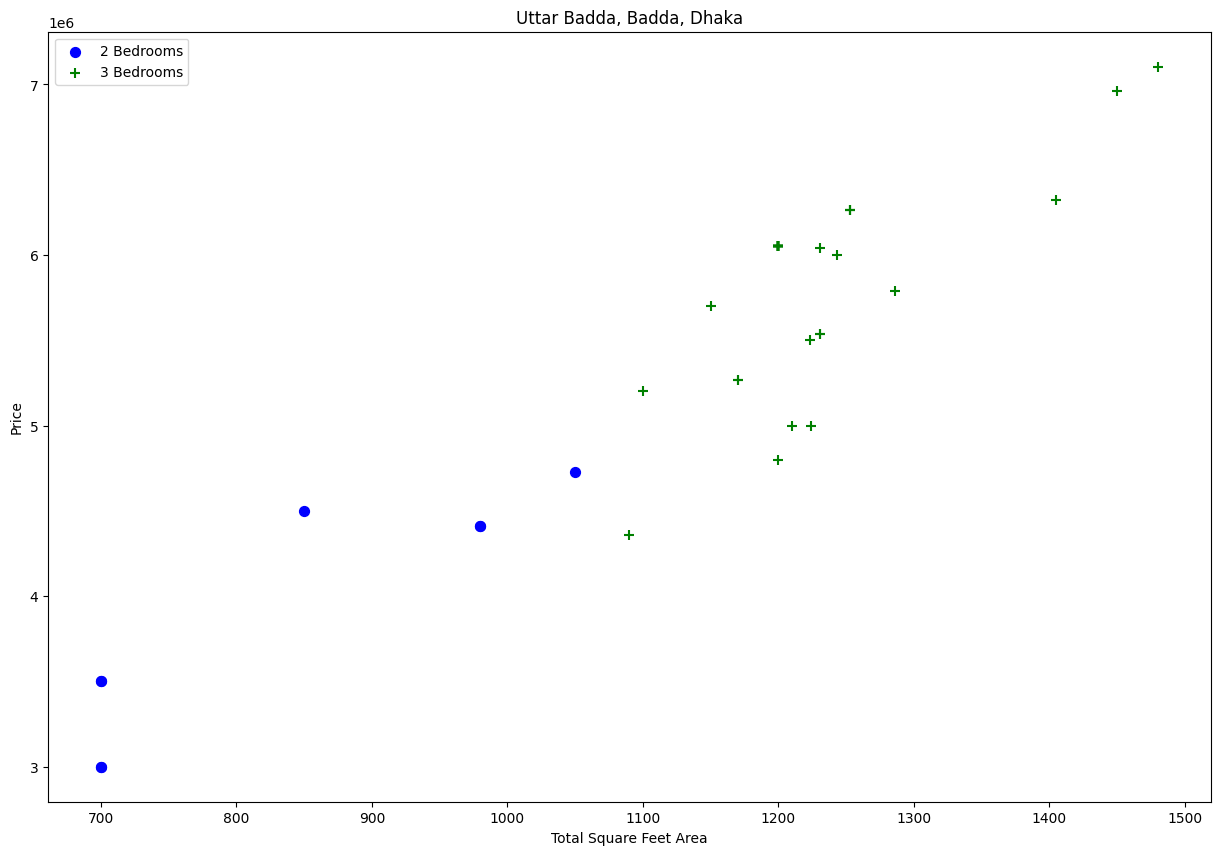

In [31]:
def plot_scatter_chart(df,Location):
    Bedrooms2 = df[(df['Location'] == Location) & (df['No. Beds'] == 2)]
    Bedrooms3 = df[(df['Location'] == Location) & (df['No. Beds'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(Bedrooms2.Area,Bedrooms2.Price,color='blue',label='2 Bedrooms', s=50)
    plt.scatter(Bedrooms3.Area,Bedrooms3.Price,marker='+', color='green',label='3 Bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df5,"Uttar Badda, Badda, Dhaka")


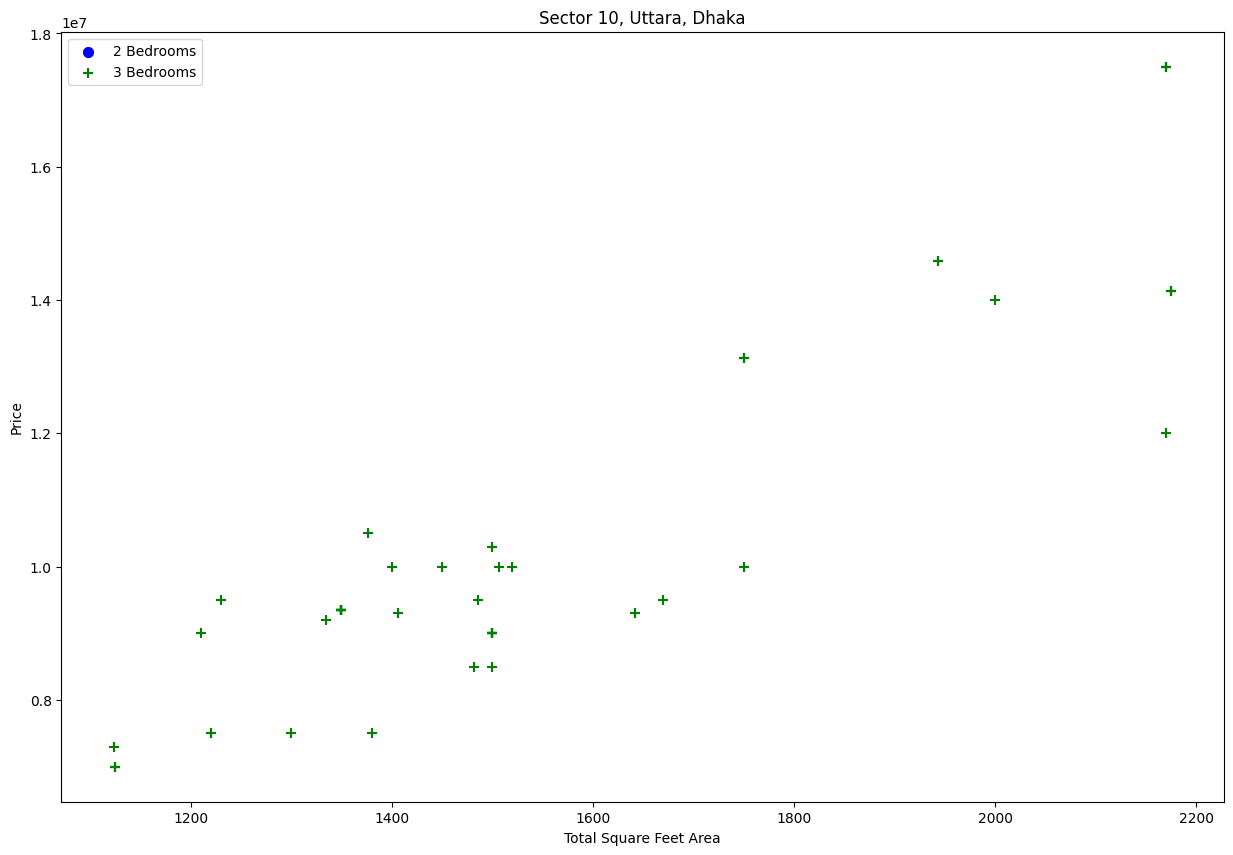

In [32]:
plot_scatter_chart(df5,"Sector 10, Uttara, Dhaka")

In [33]:
Location_stats.head(10)

Location
West Shewrapara, Mirpur, Dhaka                   111
Uttar Badda, Badda, Dhaka                        108
Sector 10, Uttara, Dhaka                          96
Chandrima Model Town, Mohammadpur, Dhaka          93
Ashkona, Dakshin Khan, Dhaka                      87
West Dhanmondi and Shangkar, Dhanmondi, Dhaka     79
Darussalam, Mirpur, Dhaka                         70
Pallabi, Mirpur, Dhaka                            66
Kallyanpur, Mirpur, Dhaka                         65
Section 10, Mirpur, Dhaka                         64
Name: count, dtype: int64

In [34]:
def remove_Bedrooms_outliers(df):
    exclude_indices = np.array([])
    for Location, Location_df in df.groupby('Location'):
        Bedrooms_stats = {}
        for Bedrooms, Bedrooms_df in Location_df.groupby('No. Beds'):
            Bedrooms_stats[Bedrooms] = {
                'mean': np.mean(Bedrooms_df.Price_per_sqft),
                'std': np.std(Bedrooms_df.Price_per_sqft),
                'count': Bedrooms_df.shape[0]
            }
        for Bedrooms, Bedrooms_df in Location_df.groupby('No. Beds'):
            stats = Bedrooms_stats.get(Bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Bedrooms_df[Bedrooms_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_Bedrooms_outliers(df5)
# df6 = df5.copy()
df6.shape

(2710, 6)

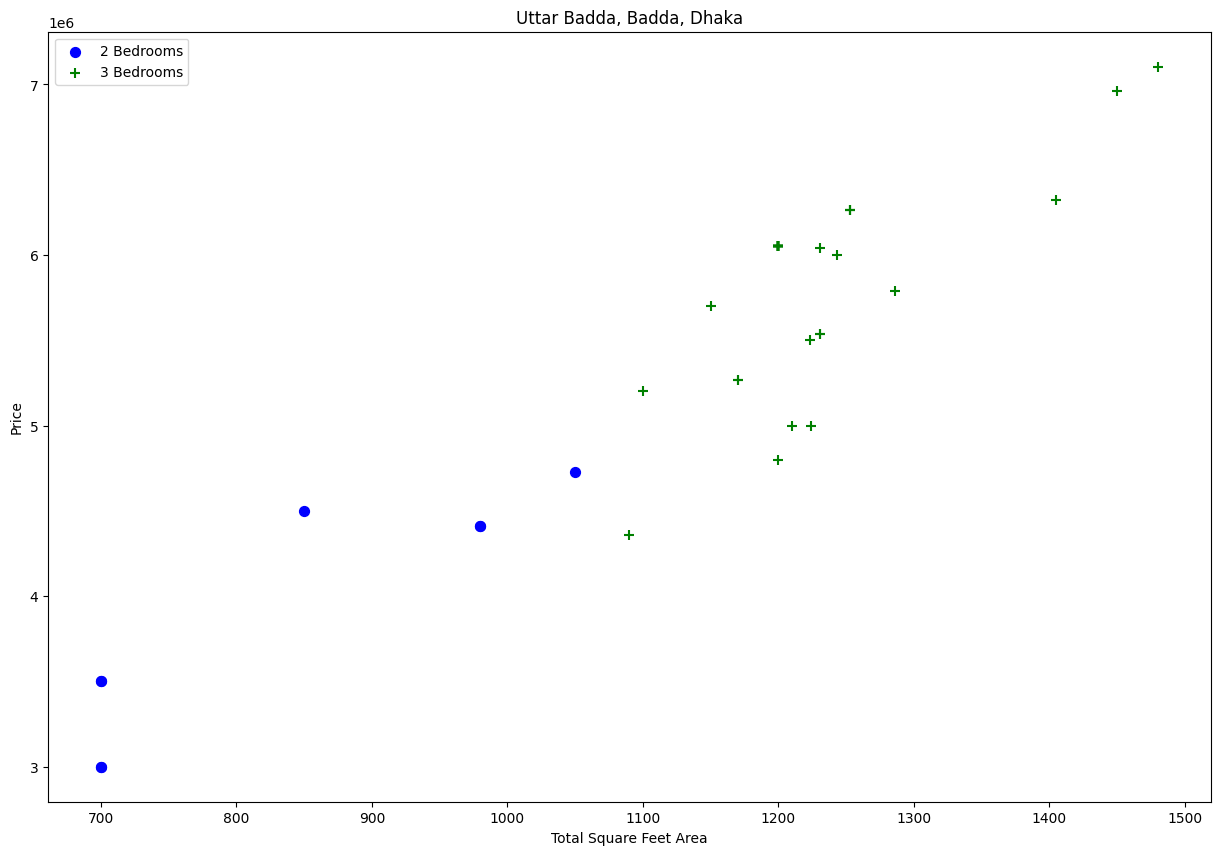

In [41]:
plot_scatter_chart(df5,"Uttar Badda, Badda, Dhaka")

Text(0, 0.5, 'Count')

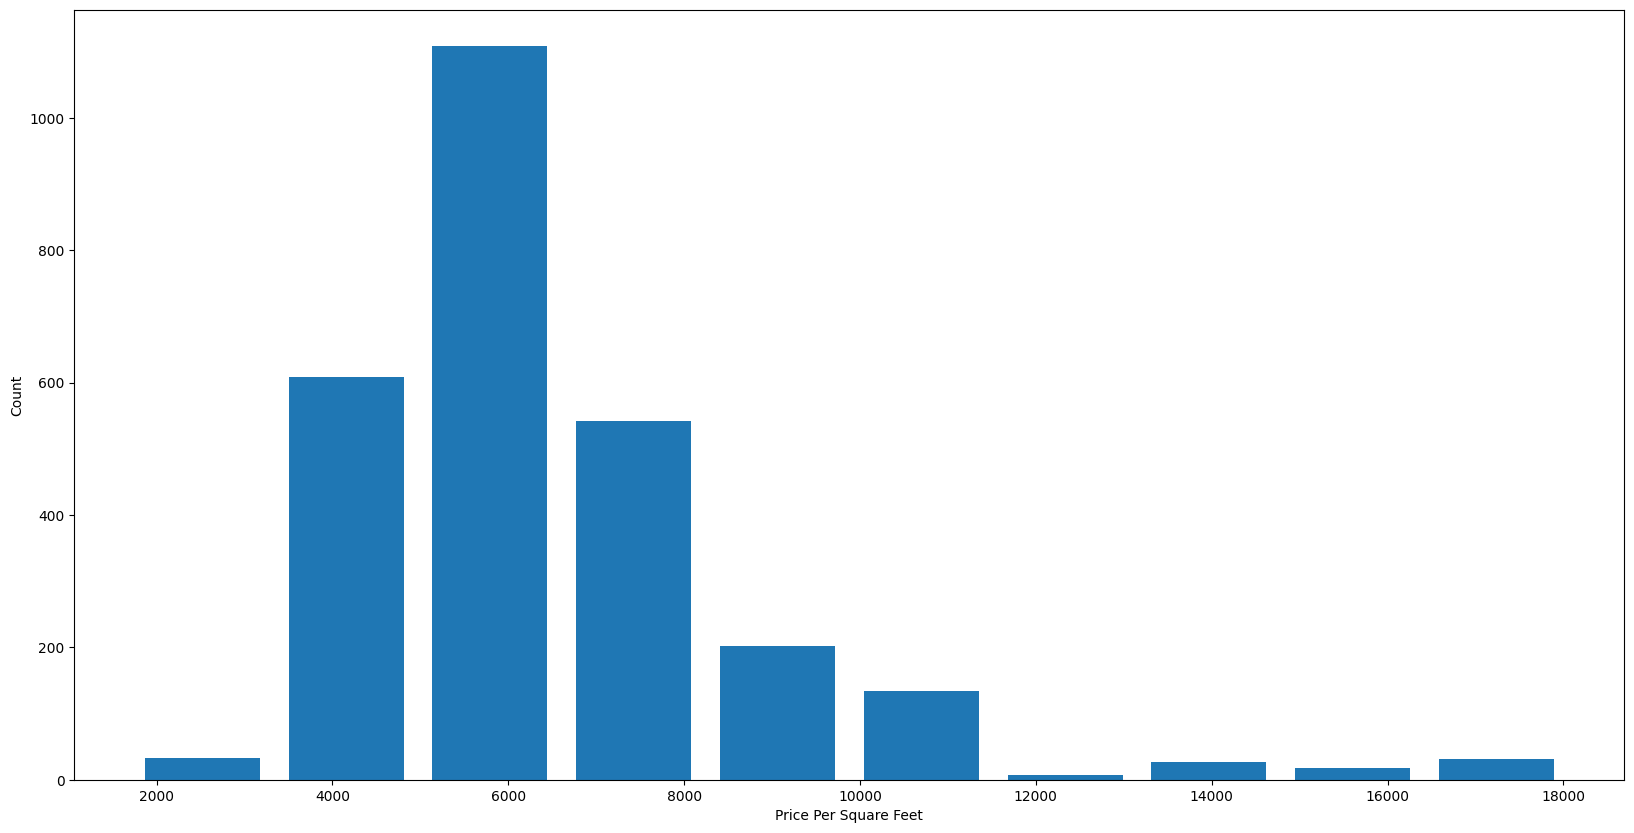

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df6['No. Baths'].unique()

array([ 3.,  2.,  4.,  5.,  1., 10.,  7.,  6.,  8.])

In [44]:
df6[df6['No. Baths']>7]

,Location,Price,No. Beds,No. Baths,Area,Price_per_sqft
300,"Block C, Banasree, Dhaka",70500000,20.0,10.0,12000.0,5875.000000
301,"Block C, Banasree, Dhaka",65000000,14.0,10.0,11900.0,5462.184874
469,"Block F, Bashundhara R-A, Dhaka",70000000,18.0,10.0,9120.0,7675.438596
1098,"Jigatola, Hazaribag, Dhaka",25000000,8.0,8.0,4500.0,5555.555556
1557,Other,33000000,20.0,10.0,7200.0,4583.333333
2513,"Sector 4, Uttara, Dhaka",65000000,12.0,10.0,6684.0,9724.715739


Text(0, 0.5, 'Count')

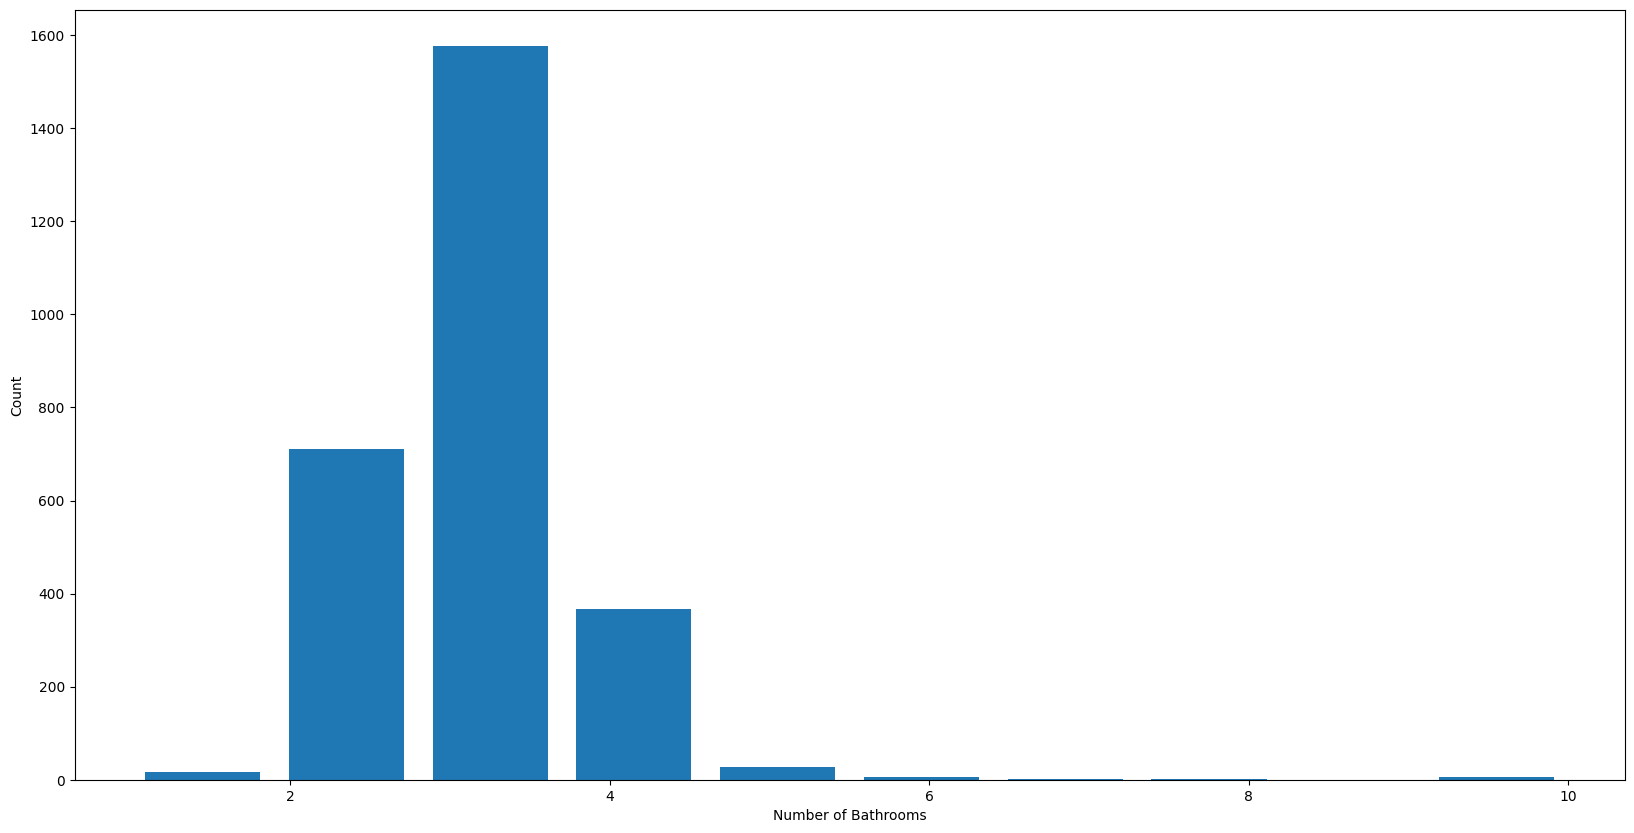

In [45]:
plt.hist(df6['No. Baths'],rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [48]:
df6[df6['No. Baths']>df6['No. Beds']+1]

,Location,Price,No. Beds,No. Baths,Area,Price_per_sqft
426,"Block E, Bashundhara R-A, Dhaka",15000000,3.0,5.0,2278.0,6584.723442
665,"Central Road, Dhanmondi, Dhaka",40000000,4.0,6.0,3000.0,13333.333333
1032,"Gulshan 1, Gulshan, Dhaka",75000000,4.0,6.0,4500.0,16666.666667
2427,"Sector 10, Uttara, Dhaka",14137500,3.0,5.0,2175.0,6500.000000
2428,"Sector 10, Uttara, Dhaka",14137500,3.0,5.0,2175.0,6500.000000
2429,"Sector 10, Uttara, Dhaka",14137500,3.0,5.0,2175.0,6500.000000
2430,"Sector 10, Uttara, Dhaka",14137500,3.0,5.0,2175.0,6500.000000


In [50]:
df6.shape

(2710, 6)

In [56]:
df7 = df6[df6['No. Baths']<df6['No. Beds']+2]
df7.shape

(2703, 6)

In [57]:
df8 = df7.drop(['Price_per_sqft'],axis='columns')
df8.head(3)

,Location,Price,No. Beds,No. Baths,Area
0,"Adarsha Nagar, Badda, Dhaka",6000000,3.0,3.0,1500.0
1,"Adarsha Nagar, Badda, Dhaka",6000000,3.0,3.0,1500.0
2,"Adarsha Nagar, Badda, Dhaka",5200000,3.0,3.0,1300.0


In [58]:
dummies = pd.get_dummies(df8.Location)
dummies.head(3)

,"Adarsha Nagar, Badda, Dhaka","Ahmed Nagar, Mirpur, Dhaka","Asad Avenue, Mohammadpur, Dhaka","Ashi Dag Road, Ibrahimpur, Dhaka","Ashkona, Dakshin Khan, Dhaka","Ashulia, Savar, Dhaka","Ati Bazar, Keraniganj, Dhaka","Babar Road, Mohammadpur, Dhaka","Baitul Aman Housing Society, Adabor, Dhaka","Bank Colony, Savar, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Dhanmondi, Dhanmondi, Dhaka","West Dolairpar, Shyampur, Dhaka","West Kazipara, Mirpur, Dhaka","West Monipur, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df9 = pd.concat([df8,dummies.drop('Other',axis='columns')],axis='columns')
df9.head()

,Location,Price,No. Beds,No. Baths,Area,"Adarsha Nagar, Badda, Dhaka","Ahmed Nagar, Mirpur, Dhaka","Asad Avenue, Mohammadpur, Dhaka","Ashi Dag Road, Ibrahimpur, Dhaka","Ashkona, Dakshin Khan, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Dhanmondi, Dhanmondi, Dhaka","West Dolairpar, Shyampur, Dhaka","West Kazipara, Mirpur, Dhaka","West Monipur, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka"
0,"Adarsha Nagar, Badda, Dhaka",6000000,3.0,3.0,1500.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Adarsha Nagar, Badda, Dhaka",6000000,3.0,3.0,1500.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Adarsha Nagar, Badda, Dhaka",5200000,3.0,3.0,1300.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Adarsha Nagar, Badda, Dhaka",5400000,3.0,3.0,1350.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Adarsha Nagar, Badda, Dhaka",5236000,3.0,3.0,1300.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df10 = df9.drop('Location',axis='columns')
df10.head(2)

,Price,No. Beds,No. Baths,Area,"Adarsha Nagar, Badda, Dhaka","Ahmed Nagar, Mirpur, Dhaka","Asad Avenue, Mohammadpur, Dhaka","Ashi Dag Road, Ibrahimpur, Dhaka","Ashkona, Dakshin Khan, Dhaka","Ashulia, Savar, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Dhanmondi, Dhanmondi, Dhaka","West Dolairpar, Shyampur, Dhaka","West Kazipara, Mirpur, Dhaka","West Monipur, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka"
0,6000000,3.0,3.0,1500.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6000000,3.0,3.0,1500.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df10.shape

(2703, 210)

In [62]:
X = df10.drop(['Price'],axis='columns')
X.head(3)

,No. Beds,No. Baths,Area,"Adarsha Nagar, Badda, Dhaka","Ahmed Nagar, Mirpur, Dhaka","Asad Avenue, Mohammadpur, Dhaka","Ashi Dag Road, Ibrahimpur, Dhaka","Ashkona, Dakshin Khan, Dhaka","Ashulia, Savar, Dhaka","Ati Bazar, Keraniganj, Dhaka",...,"Wari, Sutrapur, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Dhanmondi, Dhanmondi, Dhaka","West Dolairpar, Shyampur, Dhaka","West Kazipara, Mirpur, Dhaka","West Monipur, Mirpur, Dhaka","West Nakhalpara, Tejgaon, Dhaka","West Rampura, Rampura, Dhaka","West Shewrapara, Mirpur, Dhaka"
0,3.0,3.0,1500.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3.0,1500.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,3.0,1300.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
X.shape

(2703, 209)

In [64]:
y = df10.Price
y.head(3)

0    6000000
1    6000000
2    5200000
Name: Price, dtype: int64

In [65]:
len(y)

2703

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9335466903655963

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 9.29012319e-01, -1.89969385e+16,  9.33727536e-01,  9.45164250e-01,
        9.43730230e-01])

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X, y):
    # Define the parameter grid for Linear Regression
    param_grid = {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [None, 1, 2, 4],
    }

    # Create the Linear Regression model
    lr_model = LinearRegression()

    # Create GridSearchCV object
    gs = GridSearchCV(lr_model, param_grid, cv=5, return_train_score=False)

    # Fit the model
    gs.fit(X, y)

    # Display results
    scores = {
        'model': 'Linear Regression',
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }

    return pd.DataFrame([scores], columns=['model', 'best_score', 'best_params'])

# Assuming X and y are your features and target variable
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,Linear Regression,-1.967498e+12,"{'copy_X': True, 'fit_intercept': True, 'n_job..."


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [None, 1, 2, 4],
                'positive': [True, False]
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 2.0],
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'mae', 'friedman_mse', 'poisson'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are your features and target variable
result = find_best_model_using_gridsearchcv(X, y)
result

/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/alzabir08/.local/lib

,model,best_score,best_params
0,Linear Regression,0.663185,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,Lasso Regression,0.712630,"{'alpha': 2.0, 'fit_intercept': False, 'positi..."
2,Decision Tree,0.766342,"{'criterion': 'poisson', 'max_depth': 10, 'min..."


In [89]:
def predict_price(Location, Area, No_Baths, No_Beds):    
    loc_index = np.where(X.columns == Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = No_Beds
    x[1] = No_Baths
    x[2] = Area
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [91]:
predict_price('Ashkona, Dakshin Khan, Dhaka', 1000, 3, 3)


/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4650960.058428777

In [92]:
predict_price('West Kazipara, Mirpur, Dhaka',1000, 2, 2)

/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4484496.602441923

In [93]:
predict_price('Sector 10, Uttara, Dhaka',1000, 3, 3)

/home/alzabir08/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5582174.089143489

In [94]:
import pickle
with open('Property price predictor.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [95]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))